## Plotting Benchmarking Result for PrivacyGLUE

PrivacyGLUE is a Natural Language Understanding benchmark which determines the performance of models in the privacy domain by fine-tuning, testing and measring their performance on tasks related to analysis of privacy documents.
In this notebook we visualize the benchmark performance of 5 selected transformer-based models. 

In [2]:
from plotnine import *
from plotnine.data import *

%matplotlib inline

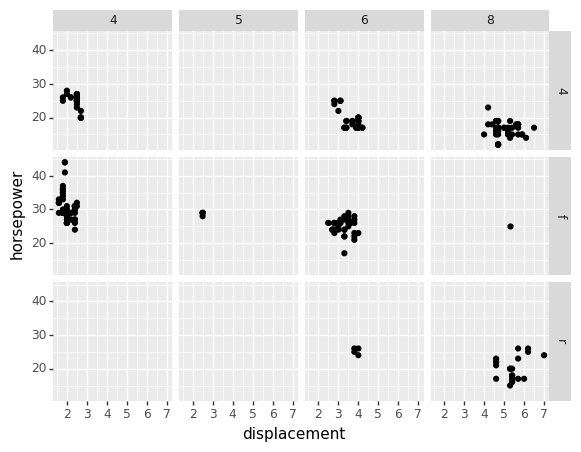

<ggplot: (402379713)>

In [3]:
(
    ggplot(mpg, aes(x='displ', y='hwy'))
    + geom_point()
    + facet_grid('drv ~ cyl')
    + labs(x='displacement', y='horsepower')
)

In [7]:
import json
import pandas as pd

In [34]:
MODELS = [
    "mukund_privbert",
    "bert_base_uncased",
    "roberta_base",
    "nlpaueb_legal_bert_base_uncased",
]
all_results = []
for model in MODELS:
    with open(f"runs_11_14_22/{model}/benchmark_summary.json", "r") as summary_file:
        model_results = json.load(summary_file)
        for task, task_dict in model_results.items():
            if task == "policy_qa":
                continue
            row_dict = {}
            row_dict["model"]= model
            row_dict["task"] = task
            row_dict["macro_f1_mean"] = task_dict["mean"][0]
            row_dict["micro_f1_mean"] = task_dict["mean"][1]
            row_dict["macro_f1_std"] = task_dict["std"][1]
            row_dict["micro_f1_std"] = task_dict["std"][1]
            row_dict["num_samples"] = task_dict["num_samples"]
            all_results.append(row_dict)

In [35]:
all_results = pd.DataFrame(all_results)
all_results

,model,task,macro_f1_mean,micro_f1_mean,macro_f1_std,micro_f1_std,num_samples
0,mukund_privbert,privacy_qa,0.553336,0.902381,0.000772,0.000772,8
1,mukund_privbert,opp_115,0.820979,0.872396,0.003824,0.003824,10
2,mukund_privbert,piextract,0.664122,0.664122,0.034249,0.034249,10
3,mukund_privbert,policy_ie_a,0.752586,0.862344,0.009587,0.009587,10
4,mukund_privbert,policy_ie_b,0.553711,0.557272,0.013451,0.013451,10
5,mukund_privbert,policy_detection,0.873482,0.928900,0.008152,0.008152,10
6,bert_base_uncased,privacy_qa,0.535341,0.899803,0.000862,0.000862,8
7,bert_base_uncased,opp_115,0.784412,0.839936,0.004648,0.004648,10
8,bert_base_uncased,piextract,0.600265,0.600265,0.026643,0.026643,10
9,bert_base_uncased,policy_ie_a,0.729090,0.846974,0.009568,0.009568,10


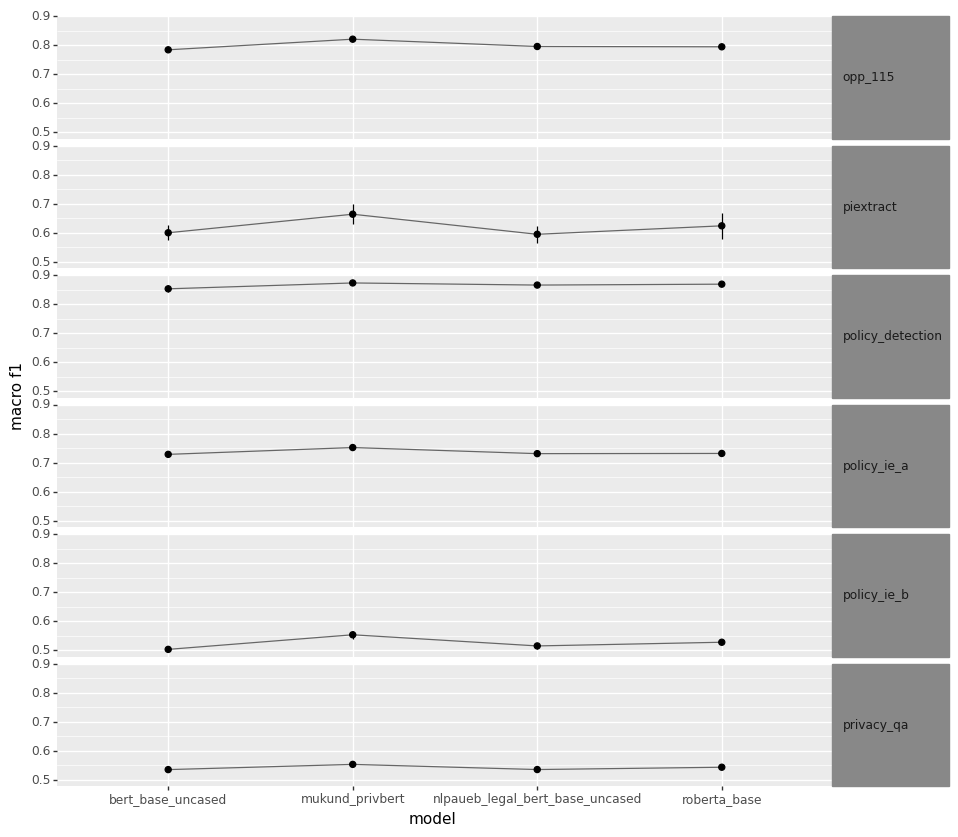

<ggplot: (678037655)>

In [68]:
(
    ggplot(all_results, aes(x='model', y='macro_f1_mean', ymin='macro_f1_mean - macro_f1_std', ymax='macro_f1_mean + macro_f1_std', group='task'))
    + geom_line(color='#666666')
    + geom_pointrange()
    + facet_grid('task ~ .')
    + theme(strip_text_y = element_text(angle = 0,              # change facet text angle
                                        ha = 'left'             # change text alignment
                                       ),
           strip_background_y = element_text(color = '#888888' # change background colour of facet background
                                              , width = 0.15     # adjust width of facet background to fit facet text
                                             ),
            figure_size=(10, 10)                                 # adjust width & height of figure to fit y-axis
           )
    + labs(x='model', y='macro f1')
)